In [3]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/mse dataset.csv')

In [6]:
# Display the first few rows of the dataset
print(df.head())

  Stock Name Ticker Symbol  Current Price (USD)  Market Cap (in Billion USD)  \
0      Apple          AAPL                175.2                         2800   
1  Microsoft          MSFT                310.5                         2500   
2     Amazon          AMZN                132.8                         1700   
3     Google         GOOGL               2750.4                         1800   
4      Tesla          TSLA                815.3                          900   

   Daily Change (%)      Short Term Price Movement (%)  
0               1.2    [-0.75, 2.7, 1.39, 0.59, -2.06]  
1              -0.8    [-2.06, -2.65, 2.2, 0.61, 1.25]  
2               2.3  [-2.88, 2.82, 1.99, -1.73, -1.91]  
3              -1.4  [-1.9, -1.17, 0.15, -0.41, -1.25]  
4               3.1  [0.67, -2.16, -1.25, -0.8, -0.26]  


In [7]:
# Display the first few rows of the dataset
print(df.head())

  Stock Name Ticker Symbol  Current Price (USD)  Market Cap (in Billion USD)  \
0      Apple          AAPL                175.2                         2800   
1  Microsoft          MSFT                310.5                         2500   
2     Amazon          AMZN                132.8                         1700   
3     Google         GOOGL               2750.4                         1800   
4      Tesla          TSLA                815.3                          900   

   Daily Change (%)      Short Term Price Movement (%)  
0               1.2    [-0.75, 2.7, 1.39, 0.59, -2.06]  
1              -0.8    [-2.06, -2.65, 2.2, 0.61, 1.25]  
2               2.3  [-2.88, 2.82, 1.99, -1.73, -1.91]  
3              -1.4  [-1.9, -1.17, 0.15, -0.41, -1.25]  
4               3.1  [0.67, -2.16, -1.25, -0.8, -0.26]  


In [8]:
# Get summary statistics of numerical variables
print(df.describe())

       Current Price (USD)  Market Cap (in Billion USD)  Daily Change (%)
count            25.000000                    25.000000          25.00000
mean          21925.976000                   668.400000           0.54400
std          107933.481613                   832.360749           1.82119
min              10.500000                    20.000000          -3.20000
25%              98.400000                   110.000000          -0.80000
50%             162.300000                   370.000000           0.70000
75%             380.400000                   650.000000           1.90000
max          540000.000000                  2800.000000           4.50000


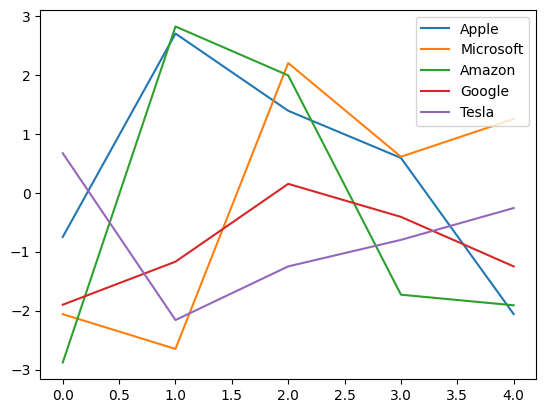

In [10]:
# Convert string to list
df["Short Term Price Movement (%)"] = df["Short Term Price Movement (%)"].apply(eval)

# Plot first 5 stocks
plt.figure()
for i in range(5):
    plt.plot(df["Short Term Price Movement (%)"][i], label=df["Stock Name"][i])

plt.legend()
plt.show()

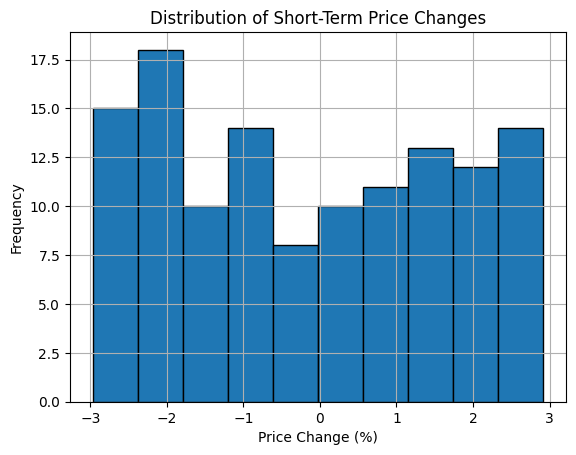

In [13]:


# Plot histogram directly using pandas
df.explode("Short Term Price Movement (%)")["Short Term Price Movement (%)"].hist(bins=10, edgecolor='black')
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Short-Term Price Changes")
plt.show()

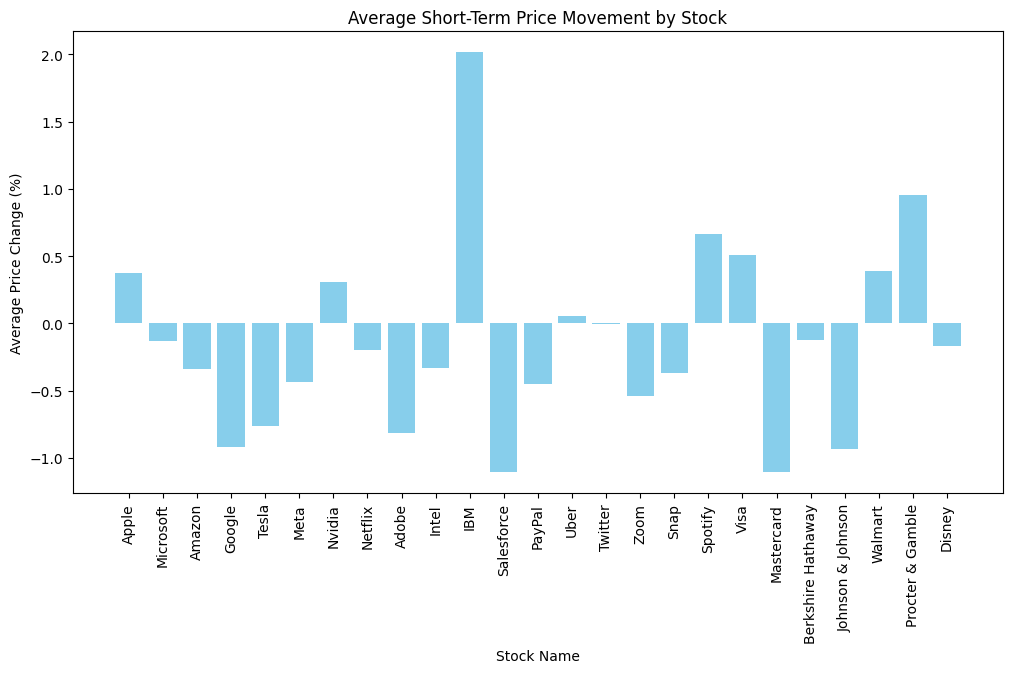

In [15]:
# Calculate average short-term price movement for each stock
df["Average Movement"] = df["Short Term Price Movement (%)"].apply(lambda x: sum(x) / len(x))

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["Stock Name"], df["Average Movement"], color='skyblue')
plt.xlabel("Stock Name")
plt.ylabel("Average Price Change (%)")
plt.title("Average Short-Term Price Movement by Stock")
plt.xticks(rotation=90)
plt.show()


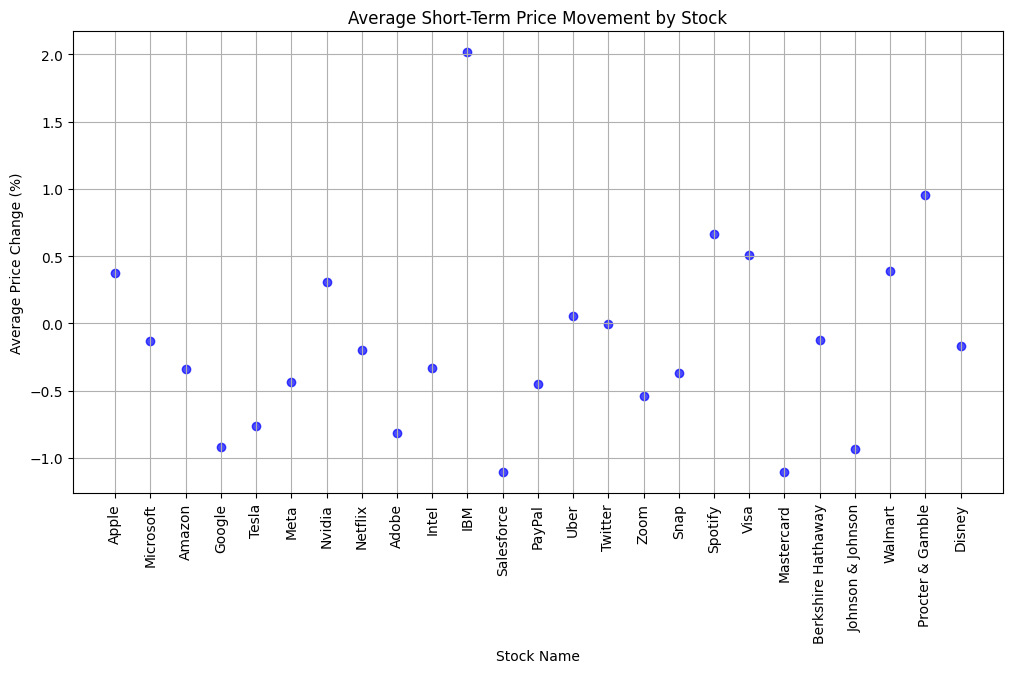

In [16]:
# Calculate average short-term price movement for each stock
df["Average Movement"] = df["Short Term Price Movement (%)"].apply(lambda x: sum(x) / len(x))

# Plot scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df["Stock Name"], df["Average Movement"], color='blue', alpha=0.7)
plt.xlabel("Stock Name")
plt.ylabel("Average Price Change (%)")
plt.title("Average Short-Term Price Movement by Stock")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

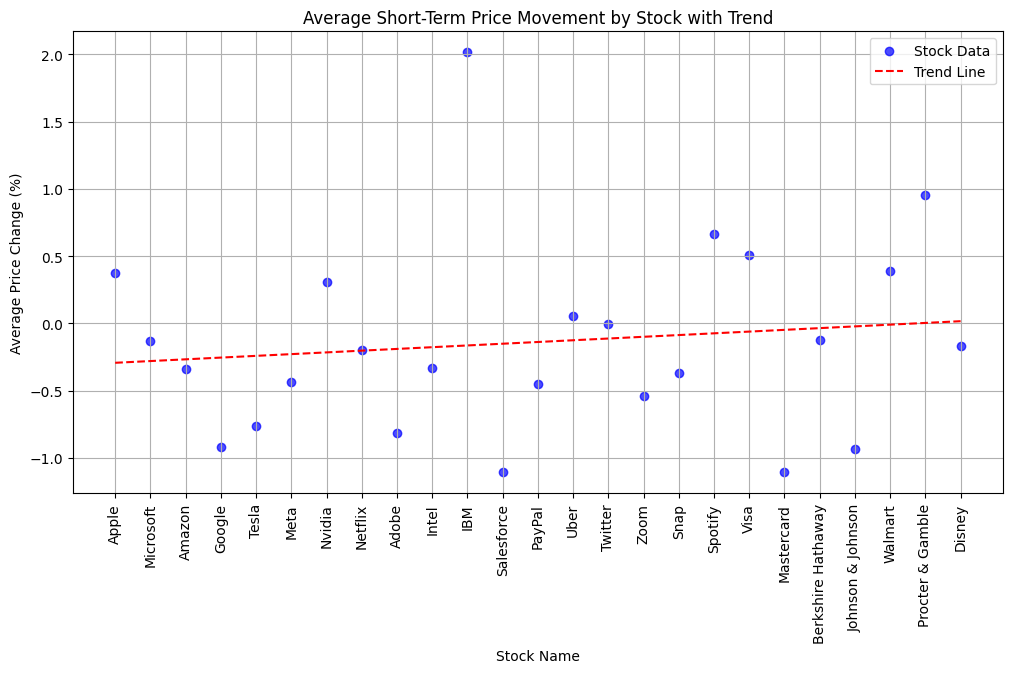

In [17]:
# Determine trend direction
trend = np.polyfit(range(len(df)), df["Average Movement"], 1)  # Linear trend line
trend_line = np.poly1d(trend)

# Plot scatter plot with trend line
plt.figure(figsize=(12, 6))
plt.scatter(df["Stock Name"], df["Average Movement"], color='blue', alpha=0.7, label="Stock Data")
plt.plot(df["Stock Name"], trend_line(range(len(df))), color='red', linestyle='dashed', label="Trend Line")

plt.xlabel("Stock Name")
plt.ylabel("Average Price Change (%)")
plt.title("Average Short-Term Price Movement by Stock with Trend")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()